# Intro

This project is made by Open University Computer Science students Vitaly Chait and Gabriel Shapiro. We debated on what our project should be about and we landed on the idea of profanity identification within text. We both saw the need for this type of technology to be implemented within the social media universe and we were both very interested to get to work.

![Profanity_intro](https://www.theoakleafnews.com/wp-content/uploads/2018/04/Profanity-illustration-900x675.jpg)

## The Problem / Solution

There is a constant rise to the number of devices connected to the web (IOT) and the content being spread by different people across the globe. Also, the starting age of the user is constantly decreasing to our new reality, a reality where every elementary school and even kindergarten kids are already surfing in the open web alone without any parent supervising their activity. 

### This leads us to the idea of our final data science & machine learning project.
The project will create a scoring system, that will give a pass \ no pass to content loading to its interface. Underage browsers will be able to see content that is suitable for their age by only including text that matches their threshold of profanity. There are many obstacles that must be tested for in order for the model to have a good reliability rating of correct classification. The english language is very safisticated with its grammar, and the meaning of a sentence can change with one word or one symbol. We will be working with datasets of collected sentences from the internet that we will be able to register inside our testing model and classify each sentence with a profanity grade.

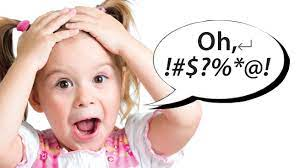

# 1. INIT and prerequisites 

[Download and install Visual Studio](https://visualstudio.microsoft.com/downloads/)

### If you have an Nvidia GPU you are welcomed to download CUDA 
[CUDA](https://developer.nvidia.com/cuda-downloads) + [cudnn](https://developer.nvidia.com/cudnn)

##### @Quick Start Parameters - set True or False the parameter below for activation
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [1]:
kaggle = True
SHORT_RUN = False
LONG_RUN = False

In [2]:
input_path = ""
scrapy_path= ""
if kaggle:
    input_path = r"../input/" + input_path
    import sys, os
    sys.path.append(os.path.abspath(r"../input/scrapygoodnews/scrapygoodnews/"))
    sys.path.append(os.path.abspath(r"../input/scrapygoodnews/scrapygoodnews/spiders/"))
                    

### Libraries

In [3]:
import platform
import os

print(os.getcwd())

try:
    os.add_dll_directory("C:/Program Files/NVIDIA GPU Computing Toolkit/CUDA/v11.2/bin")
except:
    print("")
    
print("Python version: {:>30}".format(platform.python_version()))

try:
    import scrapy
except:
    !pip3 install Scrapy
print("scrapy version: {:>30}".format(scrapy.__version__))
    
try:
    import cv2
except:
    !pip3 install cv2
print("OpenCV version: {:>30}".format(cv2.__version__))

try:
    import pandas
except:
    !pip3 install pandas
print("pandas version: {:>30}".format(pandas.__version__))

try:
    import PIL
except:
    !pip3 install pillow
print("PIL version: {:>33}".format(PIL.__version__))

try:
    import numpy
except:
    !pip3 install numpy
print("numpy version: {:>32}".format(numpy.__version__))
    
try:
    import joblib
except:
    !pip3 install joblib
print("joblib version: {:>30}".format(joblib.__version__))
    
try:
    import sklearn
except:
    !pip3 install sklearn    
print("sklearn version: {:>30}".format(sklearn.__version__))

try:
    import tensorflow
except:
    !pip3 install tensorflow 
print("tensorflow version: {:>26}".format(tensorflow.__version__))


try:
    import matplotlib
except:
    !pip3 install matplotlib
print("matplotlib version: {:>26}".format(matplotlib.__version__))   

try:
    import IPython
except:
    !pip3 install IPython
print("IPython version: {:>30}".format(IPython.__version__))

try:
    import spacy
except:
    !pip3 install spacy
print("spacy version: {:>31}".format(spacy.__version__))

try:
    import seaborn
except:
    !pip3 install seaborn
print("seaborn version: {:>30}".format(seaborn.__version__))

try:
    import statsmodels
except:
    !pip3 install statsmodels
print("statsmodels version: {:>26}".format(statsmodels.__version__))  

try:
    import gensim
except:
    !pip3 install gensim
print("gensim version: {:>30}".format(gensim.__version__))  


try:
    import nltk
except:
    !pip3 install statsmodels
print("nltk version: {:>32}".format(nltk.__version__)) 

try:
    import requests
except:
    !pip3 install requests
print("requests version: {:>29}".format(requests.__version__)) 

try:
    import statsmodels
except:
    !pip3 install statsmodels
print("statsmodels version: {:>26}".format(statsmodels.__version__))

try:
    import tqdm
except:
    !pip3 install tqdm
print("tqdm version: {:>33}".format(tqdm.__version__))

try:
    import pytesseract
except:
    !pip3 install pytesseract
print("pytesseract version: {:>25}".format(pytesseract.__version__))

try:
    import transformers
except:
    !pip3 install transformers
print("transformers version: {:>24}".format(transformers.__version__))

try:
    import bertviz
except:
    !pip3 install bertviz




%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
import multiprocessing 

/kaggle/working

Python version:                         3.7.10
     |████████████████████████████████| 254 kB 545 kB/s 
     |████████████████████████████████| 65 kB 1.6 MB/s 
     |████████████████████████████████| 47 kB 1.9 MB/s 
     |████████████████████████████████| 3.2 MB 2.9 MB/s 
  Created wheel for protego: filename=Protego-0.1.16-py3-none-any.whl size=7782 sha256=4aac8418574dee2e19b9491feef43c946f6cf8dbe82de33a82ba39165124596a
  Stored in directory: /root/.cache/pip/wheels/ca/44/01/3592ccfbcfaee4ab297c4097e6e9dbe1c7697e3531a39877ab
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11515 sha256=6a3a147c0314cb961608046c5744b1727e6c9a119d028a168334c826f89409a8
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built protego PyDispatcher


NameError: name 'scrapy' is not defined

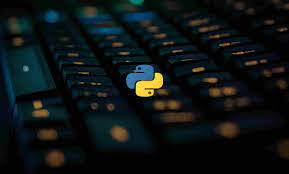

##### @GPU_ENABLED - set True or False the parameter below for activation
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
GPU_ENABLED = True # Change to False if you don't have GPU

In [ ]:
if GPU_ENABLED:
    physical_devices = tensorflow.config.list_physical_devices('GPU')
    print("Num GPUs:", len(physical_devices))
    try:
        spacy.prefer_gpu()
    except:
        print("Not able to activate gpu")

cores = multiprocessing.cpu_count()
print("Num CPUs:", cores)

Hi reader, if you wish to optimize performence more you can read the link below
[Feel free to read more about optimizations](https://spacy.io/usage/processing-pipelines)

<img src="https://hlassets.paessler.com/common/files/preview/sql-monitoring.png" alt="Drawing" style="width: 12000px;"/>

# 2. Data and Data Collection

### 2.1 Scrapy crawling data collection
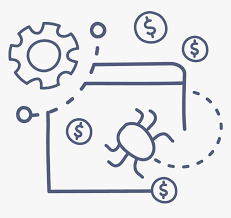

##### @Crawl - Set this parameter to "True" or "False" if you wish to activate it
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
activate_crawl = False
if SHORT_RUN == True:
    activate_crawl = False

Scrappy code below. 
Blocks format is ("file_name.py", path)

##### 2.1.1.1  "items.py" file 
--> scrapygoodnews\scrapygoodnews\items.py

In [ ]:
import scrapy

class ScrapygoodnewsItem(scrapy.Item):
    story = scrapy.Field()
    url = scrapy.Field()

##### 2.1.1.2  "goodnews_scrape.py" file 
--> scrapygoodnews\scrapygoodnews\spiders\goodnews_scrape.py

In [ ]:
import scrapy

class Goodnews(scrapy.Spider):
    name = "my_scraper"
    custom_settings = {
        'FEEDS': {
            'scrapygoodnews\scrapygoodnews\output\stories.csv': {
                'format': 'csv',
                'overwrite': True
            }
        }}

    allowed_domains = ['www.goodnewsnetwork.org']
    # First Start Url
    start_urls = ["https://www.goodnewsnetwork.org/category/news/page/1/"]
    n_pages = 10**5

    for i in range(2, n_pages):
        start_urls.append("https://www.goodnewsnetwork.org/category/news/page/" + str(i))

    def parse(self, response):
        for href in response.xpath(
                '//h3[@class="entry-title td-module-title"]//@href').extract():
            yield scrapy.Request(href, callback=self.parse_dir_contents)

    def parse_dir_contents(self, response):
        item = ScrapygoodnewsItem()

        # Getting Story
        story_list = response.xpath('//div[@class="td-post-content"]//p/text()').extract()
        story_list = [x.strip() for x in story_list if len(x.strip()) > 0]

        if len(story_list) > 0:
            item['story'] = " ".join(story_list)# Url (The link to the page)
            item['url'] = response.xpath("//meta[@property='og:url']/@content").extract()
            yield item
        else:
            pass

##### 2.1.1.3 settings.py --> \scrapygoodnews\scrapygoodnews\settings.py

In [ ]:
# Scrapy settings for scrapygoodnews project
#
# For simplicity, this file contains only settings considered important or
# commonly used. You can find more settings consulting the documentation:
#
#     https://docs.scrapy.org/en/latest/topics/settings.html
#     https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#     https://docs.scrapy.org/en/latest/topics/spider-middleware.html
import logging

BOT_NAME = 'scrapygoodnews'

SPIDER_MODULES = ['spiders']
NEWSPIDER_MODULE = 'spiders'
    


# Crawl responsibly by identifying yourself (and your website) on the user-agent
USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'

# Obey robots.txt rules
ROBOTSTXT_OBEY = True

LOG_LEVEL = logging.WARNING

# Configure maximum concurrent requests performed by Scrapy (default: 16)
#CONCURRENT_REQUESTS = 32

# Configure a delay for requests for the same website (default: 0)
# See https://docs.scrapy.org/en/latest/topics/settings.html#download-delay
# See also autothrottle settings and docs
#DOWNLOAD_DELAY = 3
# The download delay setting will honor only one of:
#CONCURRENT_REQUESTS_PER_DOMAIN = 16
#CONCURRENT_REQUESTS_PER_IP = 16

# Disable cookies (enabled by default)
COOKIES_ENABLED = False

# Disable Telnet Console (enabled by default)
TELNETCONSOLE_ENABLED = False

# Override the default request headers:
#DEFAULT_REQUEST_HEADERS = {
#   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
#   'Accept-Language': 'en',
#}

# Enable or disable spider middlewares
# See https://docs.scrapy.org/en/latest/topics/spider-middleware.html
#SPIDER_MIDDLEWARES = {
#    'scrapygoodnews.middlewares.ScrapygoodnewsSpiderMiddleware': 543,
#}

# Enable or disable downloader middlewares
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html
#DOWNLOADER_MIDDLEWARES = {
#    'scrapygoodnews.middlewares.ScrapygoodnewsDownloaderMiddleware': 543,
#}

# Enable or disable extensions
# See https://docs.scrapy.org/en/latest/topics/extensions.html
#EXTENSIONS = {
#    'scrapy.extensions.telnet.TelnetConsole': None,
#}

# Configure item pipelines
# See https://docs.scrapy.org/en/latest/topics/item-pipeline.html
#ITEM_PIPELINES = {
#    'scrapygoodnews.pipelines.ScrapygoodnewsPipeline': 300,
#}

# Enable and configure the AutoThrottle extension (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/autothrottle.html
#AUTOTHROTTLE_ENABLED = True
# The initial download delay
#AUTOTHROTTLE_START_DELAY = 5
# The maximum download delay to be set in case of high latencies
#AUTOTHROTTLE_MAX_DELAY = 60
# The average number of requests Scrapy should be sending in parallel to
# each remote server
#AUTOTHROTTLE_TARGET_CONCURRENCY = 1.0
# Enable showing throttling stats for every response received:
#AUTOTHROTTLE_DEBUG = False

# Enable and configure HTTP caching (disabled by default)
# See https://docs.scrapy.org/en/latest/topics/downloader-middleware.html#httpcache-middleware-settings
#HTTPCACHE_ENABLED = True
#HTTPCACHE_EXPIRATION_SECS = 0
#HTTPCACHE_DIR = 'httpcache'
#HTTPCACHE_IGNORE_HTTP_CODES = []
#HTTPCACHE_STORAGE = 'scrapy.extensions.httpcache.FilesystemCacheStorage'

##### 2.1.1.4 run_spider_file.py 
--> \scrapygoodnews\scrapygoodnews\run_spider_file.py

In [ ]:
if kaggle: 
    import settings as my_settings
    from scrapy.settings import Settings
    from scrapy.crawler import CrawlerProcess
    
    
    
stop_after_crawl = True

def run_spider():
    """run spider with Goodnews"""
    # Import settings from project and not terminal default path
    crawler_settings = Settings()
    crawler_settings.setmodule(my_settings)
    crawler_settings.update({"SPIDER_MODULES": SPIDER_MODULES})
    crawler_settings.update({"NEWSPIDER_MODULE": NEWSPIDER_MODULE})

    crawler = CrawlerProcess(crawler_settings)
    # Avoid Twisted reactor issue - For running the same notebook
    print("Spider start running\n /╲/\\(╭ •̀ •́╮)/\\╱\\ \t /╲/\\(╭ •̀ •́╮)/\╱\\ \t /╲/\\(╭ •̀ •́╮)/\\╱\\")
    crawler.crawl(Goodnews)
    crawler.start(stop_after_crawl=stop_after_crawl)
    print("Spider end")

In [ ]:
if activate_crawl:
    run_spider()

<img src="https://www.springboard.com/library/static/fc5022f0026f5380ffc5802111b21527/bbc2a/DSC-Article-DSC-Roles-DataScientist.png" alt="Drawing" style="width: 800px;"/>

## 2.2 The Data

We will begin with explaining the datasets that we are working with. These are built quite differently.


#### 2.2.1 Data_a
The dataset contains twitter comments with a class column that that gives 1 if there is offensive language, 0 if there is hate speech and 2 if there is neither.


#### 2.2.2 Data_b
The dataset is from wikipedia texts classifies whether each text is toxic speech or threatining speech or other types, and we were able to take that and say that if any of those classifications exist that we can label it as profane language.


#### 2.2.3 Data_c
We will also use data from sources that were not manually labeled as part of a sponsored project (Keggle/etc..), this type of data is generated from known sources with high rate of success being correct without manual verification. 
We used scrappy opensource package to crawl "https://www.goodnewsnetwork.org/" and extract the text from the articles that were posted there. 


#### 2.2.4 Data_d, e, f, g, h
Random lists of bad words we found online that come in different formats

####  2.2.5 Data - Source URLS

##### 2.2.5.1 Labled Datasets
[Database 1 - Source](https://github.com/t-davidson/hate-speech-and-offensive-language/tree/master/data)

[Database 2 - Source](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/)


##### 2.2.5.2 Scrapy
[The good news network website](https://www.goodnewsnetwork.org/more/about-us/)


##### 2.2.5.3 Bad words lists
[DB4](https://github.com/web-mech/badwords/blob/master/lib/lang.json)
[DB5](http://www.bannedwordlist.com/)
[DB6](https://www.freewebheaders.com/bad-words-list-and-page-moderation-words-list-for-facebook/)
[DB7](https://www.freewebheaders.com/youtube-blacklist-words-list-youtube-comment-moderation/)
[DB8](https://www.freewebheaders.com/full-list-of-bad-words-banned-by-google/)


<img src="https://ugc.futurelearn.com/uploads/images/b2/8f/b28f7f9d-1343-4bb7-9c09-9c3beb76fad7.png" alt="Drawing" style="width: 800px;"/>

## 2.3 Handling the data

After we gather the datasets that we want to use we have to clean the text of any superfluous characters that will not help us with detremining the sentiment of the sentence. 
The template should be some how similiar to "yes \ no" of whether the text (sentences) are offensive or not.

So the goal is that for each row  we shall provide a binary indexing of "Offensive" or not. 
To have a uniform text template we shall use filtering techniques such as splits of the parahraph to sentences, tokenizations, characters removals and more. 
In addition we shall add another column of the words counts. This can help with determing the "weight" of the word on the sentence

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
activate_db_filtering = True
if SHORT_RUN == True:
    activate_db_filtering = False
if LONG_RUN == True:
    activate_db_filtering = True

### 2.3.1 Importing the required packages and loading all the data from the disk into Pandas framework 

In [ ]:
import pandas as pd
import re
import numpy as np
from spacy import load 
from spacy.tokenizer import Tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer
import time
import string
from requests import get

In [ ]:
if activate_db_filtering:
    data_a = pd.read_csv(input_path+'materials//Cornnel//data//data//labeled_data.csv')
    data_b = pd.read_csv(input_path+'materials//Kaggle//train//train.csv')
    data_c = pd.read_csv(input_path+'scrapygoodnews//scrapygoodnews//output//stories.csv')
    data_d = pd.read_json(input_path+'materials//badwords//word_list_a.json')
    data_e = pd.read_csv(input_path+'materials//badwords//swearWords.csv')
    data_f = pd.read_csv(input_path+'materials//badwords//format_b//facebook-bad-words-list_comma-separated-text-file_2021_01_18.txt', sep="\n")
    data_g = pd.read_csv(input_path+'materials//badwords//format_b//youtube-blacklist-words-list_comma-separated-text-file_2021-01-19.txt', sep="\n")
    data_h = pd.read_csv(input_path+'materials//badwords//full-list-of-bad-words_csv-file_2021_01_18//full-list-of-bad-words_csv-file_2021_01_18.csv')
else:
    balanced = pd.read_csv(input_path+'balanced//balanced.csv')

The format of is:
1. Have a peak on the data
2. Fine tune it
3. Have another peak on it

<img src="https://www.star-spain.com/sites/default/files/Data%20record%20filtering%20for%20terminology%20management.jpg" alt="Drawing" style="width: 400px;"/>

#### 2.3.1.1 Data - A

In [ ]:
if activate_db_filtering:
    display(data_a.head())

By peaking on the database structure, we see that it has more than 2 classifications classes. The first step is to transform it to binary (Offensive or not offensive?).
Later, we see that this data was imported from a database with Tweets, it makes sense to use the NLTK TweetTokenizer to handel the data.
Finally we use some regular expression replacments to remove unwanted string sequences from the tweet.

In [ ]:
if activate_db_filtering:
    data_a_positive = data_a[data_a["class"]==2]
    data_a_positive = pd.DataFrame(data_a_positive["tweet"])
    data_a_positive = data_a_positive.rename(columns={"tweet": "Text"})
    data_a_positive = data_a_positive.assign(Negative=[0 for i in range(len(data_a_positive))])

    data_a_negative = data_a[data_a["class"]!=2]
    data_a_negative = pd.DataFrame(data_a_negative["tweet"])
    data_a_negative = data_a_negative.rename(columns={"tweet": "Text"})
    data_a_negative = data_a_negative.assign(Negative=[1 for i in range(len(data_a_negative))])


    data_a_labeled = pd.concat([data_a_positive, data_a_negative], axis=0)

    tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

    data_a_labeled['Text'] = data_a_labeled['Text'].apply(tknzr.tokenize)
    data_a_labeled['Text'] = data_a_labeled['Text'].apply(" ".join)

    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'("|! ! ! rt :)' , '', regex=True)
    data_a_labeled["Text"] = data_a_labeled["Text"].str.replace(r'(rt : )' , '', regex=True)

In [ ]:
if activate_db_filtering:
    display(data_a_labeled)

#### 2.3.1.2 Data - B 
The data is slighly different but the general idea is the same. Transform to binary classes and remove unwated string sequences.

In [ ]:
if activate_db_filtering:
    display(data_b.head())

In [ ]:
if activate_db_filtering:
    data_b_positive = data_b.loc[(data_b['toxic']==0) & (data_b['severe_toxic']==0) & (data_b['obscene']==0) & (data_b['threat']==0) 
                                & (data_b['insult']==0) & (data_b['identity_hate']==0)]

    data_b_positive = pd.DataFrame(data_b_positive["comment_text"])
    data_b_positive = data_b_positive.rename(columns={"comment_text": "Text"})
    data_b_positive = data_b_positive.assign(Negative=[0 for i in range(len(data_b_positive))])

    data_b_negative = data_b.loc[(data_b['toxic']==1) | (data_b['severe_toxic']==1) | (data_b['obscene']==1) | (data_b['threat']==1) 
                                | (data_b['insult']==1) | (data_b['identity_hate']==1)]
    data_b_negative = pd.DataFrame(data_b_negative["comment_text"])
    data_b_negative = data_b_negative.rename(columns={"comment_text": "Text"})
    data_b_negative = data_b_negative.assign(Negative=[1 for i in range(len(data_b_negative))])


    data_b_labeled = pd.concat([data_b_positive, data_b_negative], axis=0)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('\n', ' ', regex=False)
    data_b_labeled["Text"] = data_b_labeled["Text"].str.replace('"', '', regex=False)

In [ ]:
if activate_db_filtering:
    display(data_b_labeled)

#### 2.3.1.3 Data - C
Our Scrapy collection

In [ ]:
if activate_db_filtering:
    display(data_c.head())

##### 2.3.1.3.1 Porter Stemming 
We can use porter stemming to reduce the complexity, I eventually chose not to use it

<img src="http://ksabnajdorperp.janbasktraining.in/community/uploads/4af37b87638ff2b7386c7e5764d2fa12.png" alt="Drawing" style="width: 800px;"/>

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
porter_filtering = False

In [ ]:
if activate_db_filtering:
    data_c_story = pd.DataFrame(data_c["story"])
    splitted_data = [] 
    
    if porter_filtering:
        porter = PorterStemmer()
        for text in data_c_story["story"]:
            splitted_sent = sent_tokenize(text)
            for sent in splitted_sent:
                token_words = word_tokenize(sent)
                portered = [porter.stem(word) for word in token_words]
                splitted_data.append(" ".join(portered))
    else:
        for text in data_c_story["story"]:
            splitted = sent_tokenize(text)
            for i in splitted:
                splitted_data.append(i)
    
    splitted_data = pd.DataFrame(splitted_data, columns=["Text"])
    data_c_labeled = splitted_data.assign(Negative=[0 for i in range(len(splitted_data))])
        

In [ ]:
if activate_db_filtering:
    display(data_c_labeled)

#### 2.3.1.4 Data - D --> Data H
More data, this time a lists of negative words

In [ ]:
if activate_db_filtering:
    display(data_d.head())

In [ ]:
if activate_db_filtering:
    data_d_labeled = data_d.rename(columns={"words": "Text"})
    data_d_labeled = data_d_labeled.assign(Negative=[1 for i in range(len(data_d_labeled))])
    

In [ ]:
if activate_db_filtering:
    display(data_d_labeled)

In [ ]:
if activate_db_filtering:
    display(data_e.head())

In [ ]:
if activate_db_filtering:
    data_e_labeled = [[i, 1] for i in data_e]
    data_e_labeled = pd.DataFrame(data_e_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_e_labeled)

In [ ]:
if activate_db_filtering:
    display(data_f.tail())

In [ ]:
if activate_db_filtering:
    data_f_labeled = data_f.iloc[7]
    data_f_labeled = [[i,1] for i in data_f_labeled[0].split(",")]
    data_f_labeled = pd.DataFrame(data_f_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_f_labeled)

In [ ]:
if activate_db_filtering:
    display(data_g.tail())

In [ ]:
if activate_db_filtering:
    data_g_labeled = data_g.iloc[6]
    data_g_labeled = [[i,1] for i in data_g_labeled[0].split(",")]
    data_g_labeled = pd.DataFrame(data_g_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_g_labeled)

In [ ]:
if activate_db_filtering:
    display(data_h.head())

In [ ]:
if activate_db_filtering:
    data_h_labeled = data_h.iloc[:, 0]
    data_h_labeled = [[i, 1] for i in data_h_labeled]
    data_h_labeled = pd.DataFrame(data_h_labeled, columns = ["Text", "Negative"])

In [ ]:
if activate_db_filtering:
    display(data_h_labeled)

# 3. Cleaning the data futher for our EDA
Concating all the data from all different sources into 1 uniformed data frame 

In [ ]:
if activate_db_filtering:
    data_dis = pd.DataFrame([len(data_a_labeled[data_a_labeled["Negative"]==1]), len(data_a_labeled[data_a_labeled["Negative"]==0])]+[len(data_b_labeled[data_b_labeled["Negative"]==1]), len(data_b_labeled[data_b_labeled["Negative"]==0])]+[len(data_c_labeled[data_c_labeled["Negative"]==1]), len(data_c_labeled[data_c_labeled["Negative"]==0])]+[len(data_d_labeled[data_d_labeled["Negative"]==1]), len(data_d_labeled[data_d_labeled["Negative"]==0])]+[len(data_e_labeled[data_e_labeled["Negative"]==1]), len(data_e_labeled[data_e_labeled["Negative"]==0])]+[len(data_f_labeled[data_f_labeled["Negative"]==1]), len(data_f_labeled[data_f_labeled["Negative"]==0])]+[len(data_g_labeled[data_g_labeled["Negative"]==1]), len(data_g_labeled[data_g_labeled["Negative"]==0])]+[len(data_h_labeled[data_h_labeled["Negative"]==1]), len(data_h_labeled[data_h_labeled["Negative"]==0])])
    plt_x_axis = []
    color_axis = []
    [[color_axis.append("Red"), color_axis.append("Green"), plt_x_axis.append("DB "+chr(65+i)+"-"),plt_x_axis.append("DB "+chr(65+i)+"+")] for i in range(int(len(data_dis[0])/2))]
    plt.figure(figsize=(20, 4))
    plt.bar(plt_x_axis, data_dis[0], width=1, log=True, color=color_axis)
    plt.title('Distribution of database size by negative(-) and positive(+) context')
    plt.ylabel("Cells count")
    plt.xlabel("Database")
    print()
else:
    color_axis = ["Red", "Green"]

In [ ]:
if activate_db_filtering:
    data_unfinished = pd.concat([data_a_labeled,data_b_labeled,data_c_labeled, data_d_labeled, data_e_labeled, data_f_labeled, data_g_labeled, data_h_labeled], axis=0)

In [ ]:
if activate_db_filtering:
    neg = len(data_unfinished[data_unfinished["Negative"]==1])
    pos = len(data_unfinished[data_unfinished["Negative"]==0])
else:
    neg = len(balanced[balanced["Negative"]==1])
    pos = len(balanced[balanced["Negative"]==0])

ratio = min(neg, pos)/max(neg, pos)

plt.bar(["Negative","Positive"], [neg, pos], width=0.9, color=color_axis)
plt.title('Combined distribution of combined database size by negative(-) and positive(+) context')
plt.ylabel("Cells count")
plt.xlabel("Ratio:  1 to {}".format(round(ratio,3)))
print()

### 3.1 There are, unsuprisingly due to our data sources, more positive sentences than offensive. 

We can, by design, split the data to have the same number of positive and negative rows.
We will also shuffel the rows to have a uniformed data spread along the sheet.

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>


In [ ]:
# Enable this to have 50%/50% of negative and positive
split_data = True
if SHORT_RUN == True:
    split_data = False
if LONG_RUN == True:
    split_data = True

In [ ]:
if activate_db_filtering:
    if split_data:
        if neg>pos:
            negative_finished = data_unfinished[data_unfinished["Negative"]==1].sample(frac = ratio)
            positive_finished = data_unfinished[data_unfinished["Negative"]==0]
        else:
            positive_finished = data_unfinished[data_unfinished["Negative"]==0].sample(frac = ratio)
            negative_finished = data_unfinished[data_unfinished["Negative"]==1]

        # Concat 50/50 datasets 
        balanced = pd.concat([positive_finished,negative_finished], axis=0)
        # Shuffle the rows 
        balanced = balanced.sample(frac = 1).reset_index(drop=True)
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
    else:
        data_unbalanced = data_unfinished.sample(frac = 1).reset_index(drop=True)
        balanced = data_unbalanced

In [ ]:
display(balanced[balanced["Negative"]==0])

In [ ]:
display(balanced[balanced["Negative"]==1])

### 3.2 Generalize our data so that the NLP model behaves as accurate as possible

Machines are better at understanding numbers that actual text passed on as tokens.
Therefore, to overcome this problem, we: 

1. Lowercase the words. In NLP, models treat words like Dog and dog differently, even if they are the same.
2. Remove punctuations. Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but not for text analysis.
3. Expand contractions. Contractions are the shortened versions of words like don’t for do not. We need to expand these contractions for a better analysis of text. 
4. Removed some special characters, such as emojis, from our database. We do so if we are certian they hold no special meaning.
5. Remove STOP WORDs, words that generally do not add any information at all. Such as "The". 
6. Pass them through Tokenizer that gives the fine tunning and seperation between one word to another. (More in the next reading block). 

In [ ]:
def emojis() -> str:
    page = get("https://www.unicode.org/Public/UCD/latest/ucd/emoji/emoji-data.txt") # Download the most updated codes. 
    lines = page.text.split("\n")

    blacklist = [ # blacklist of element who are not really emojis
        "number sign",
        "asterisk",
        "digit zero..digit nine",
        "copyright",
        "registered",
        "double exclamation mark",
        "exclamation question mark",
        "trade mark",
        "information"
    ]
    
    unicodes = []
    extendedEmoji = {}
    for line in lines: # check all lines
        if not line.startswith("#") and len(line) > 0: # ignores comment lines and blank lines
            if line.split(')')[1].strip() not in blacklist: # check if the emoji isn't in the blacklist
                temp = f"{line.split(';')[0]}".strip() # recovery of the first column
                if ".." in temp: # if it is a "list" of emojis, adding to a dict
                    extendedEmoji[temp.split("..")[0]] = temp.split("..")[1]
                else:
                    unicodes.append(temp)
    unicodes = list(set(unicodes) - {""}) # removal of duplicates and especially of extra spaces

    def _uChar(string: str): # choice between \u and \U in addition of the "0" to complete the code
        stringLen = len(string)
        if stringLen > 7: # Can't be more than 7 anyways
            raise Exception(f"{string} is too long! ({stringLen})")
        u, totalLong = "U", 7 # Should be 7 characters long if it is a capital U
        if stringLen < 4: # 4 characters long if smaller than 4
            u, totalLong = "u", 4 # Should be 4 characters long if it is a lowercase u
        resultat = ""
        while len(f"{resultat}{string}") <= totalLong: # Adding the 0
            resultat += "0"
        return f"\{u}{resultat}" # Return the right "U" with the right number of 0

    for i in range(0, len(unicodes)): # add unicode syntax to the list
        unicodes[i] = f"{_uChar(unicodes[i])}{unicodes[i]}"
    
    for mot in extendedEmoji.items(): # add unicode syntax to the dict
        extendedEmoji[mot[0]] = f"{_uChar(mot[1])}{mot[1]}"
        temp = f"{_uChar(mot[0])}{mot[0]}-{extendedEmoji[mot[0]]}"
        if temp not in unicodes: # if not already in the list
            unicodes.append(temp) # add the item to the list

    resultat = "["
    for code in unicodes: # conversion of the list into a string with | to separate all the emojis
        resultat += f"{code}|"

    return f"{resultat[:-1]}]+"


all_emojis = emojis()

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

print("",end="")

In [ ]:
if activate_db_filtering:
    balanced["Text"] = balanced["Text"].astype(str)
    balanced["Text"] = balanced["Text"].apply(lambda x:expand_contractions(x))
    balanced['Text'] = balanced['Text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    balanced['Text'] = balanced['Text'].apply(lambda x: x.lower())
    balanced['Text'] = balanced['Text'].apply(lambda x: re.sub(all_emojis, '', x, flags = re.UNICODE))
    balanced["Text"] = balanced["Text"].str.replace('  ', ' ', regex=False)
    balanced = balanced[(balanced[["Text"]] != "").all(axis=1)]
    display(display(balanced.tail()))

### 3.3 Eventually we will tokenize the data with the same common tokenizer.

To give a sense of generalization to the data and make it even more uniformed we add an optional feature to transform the data once again with tokenizer.
We chose to use NLTK regex as a our final tokenizer and not other due to its speed.

<img src="https://miro.medium.com/max/505/1*yPuBXiIUgoLLzmmE_SvSNg.png" alt="Drawing" style="width: 800px;"/>

Alterntaive option is to use Spacy as a our final tokenizer and not NLTK. This is because while NLTK tokenizers can have a better taylor made solutions, Spacy tokenizer has a better "Single point solution" that generally suits all text sources.

It is important to note that usually any kind of generalization can reduce the accuracy of our model. In other words, our method will not provide the best reulsts but because the field of tokenization can have a whole notebook of itself we do not want to waste major time on that. Our point here is to enable high flexability for our datasets. Anu user might choose to add or remove some of sets in the future and will not need to customize a lot of the code. 

Also, as a side note, for dataset "A" we used NLTK tweeter custom made tokenizer. For dataset "B" we used the sentences NLTK tokenizer that provides faster tokenization.

Because of the Spacy DependencyParser, the operation takes some time. If you run it, let the computer work for a while you drink a cup of coffee a refresh ;)

[Read more about Spacy here](https://spacy.io/)

<img src="https://d33wubrfki0l68.cloudfront.net/2b4127b0cda5f6163af39732b81c233df8d3c822/819d1/tokenization-9b27c0f6fe98dcb26239eba4d3ba1f3d.svg" alt="Drawing" style="width: 400px;"/>

<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
spacy_enabled = True
nltk_regex = True

In [ ]:
if activate_db_filtering:
    if spacy_enabled:
        try:
            sp = spacy.load('en_core_web_sm')
        except:
            !python -m spacy download en_core_web_sm

        sp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
        
        # Lemmatization with stopwords removal
        balanced['sentences']=balanced['Text'].apply(lambda x: ' '.join([token.lemma_ for token in list(sp(x)) if (token.is_stop==False)]))
        
    else:
        balanced['sentences']=balanced['Text']
        
    
    if nltk_regex:
        ws_tokenize = WhitespaceTokenizer()
        balanced['sentences'] = balanced['sentences'].apply(ws_tokenize.tokenize)
        balanced['sentences'] = balanced['sentences'].apply(" ".join)
        
    balanced = balanced[(balanced[["sentences"]] != "").all(axis=1)]

### 3.4 Weight per word


We can also give weight, per word, for the sentence meaning. 

We must surely understand by now that "Fuck", a 1 word curse said alone, clearly has a negative meaning.
While other sentences, such as: "What the fuck just happend", has slighly less negative meaning.

Lets try to give these sentences weight by the inverse of the number of words

In [ ]:
if activate_db_filtering:
    # We will seperate by the word counts
    pattern = re.compile(r'\w+')
    balanced['Number of words'] = balanced['sentences'].apply(lambda x: max(1, len(pattern.findall(x))))
    balanced['Weight per word'] = balanced['Number of words'].apply(lambda x: 1/x)

### 3.5 Average word length

In [ ]:
if activate_db_filtering:
    l = balanced["sentences"]
    w = balanced["Number of words"]

    x = [(len(i[0])-i[1]+1)/i[1] for i in zip(l,w)] 

    balanced = balanced.assign(AverageLength=x)

In [ ]:
display(balanced)

### 3.6 Removing outliers

In [ ]:
if activate_db_filtering:
    prcntl = np.percentile(balanced["Number of words"], 98)
    balanced = balanced[balanced["Number of words"]<=prcntl]

    prcntl = np.percentile(balanced["AverageLength"], 98)
    balanced = balanced[(balanced["AverageLength"]<=prcntl) & (balanced["AverageLength"]>=1.5)].reset_index(drop=True) 

    display(balanced)

### 3.7 Saving the DataBase as a CSV file
<img src="https://media.istockphoto.com/vectors/linear-check-mark-icon-like-tick-and-cross-vector-id1019902906?k=20&m=1019902906&s=612x612&w=0&h=EMsD1KlJqPKA770M8HW7BtDLno6FKkzi7agvJWgYYNU=" alt="Drawing" style="width: 200px;"/>

In [ ]:
save_database = True
if SHORT_RUN == True:
    save_database = False
if LONG_RUN == True:
    save_database = True

In [ ]:
if activate_db_filtering:
    if save_database:
        balanced.to_csv('output\\database\\balanced.csv', index=False)

<img src="https://imgconvert.csdnimg.cn/aHR0cHM6Ly9tbWJpei5xcGljLmNuL21tYml6X3BuZy9oZVM2d1JTSFZNblZoZ1RMWEJ5Yk1URDd6ZE84RjJrcUdwSnZFZklkWkxuRFRiRmtKNGFBaWJKSUFnSm9xdmFjU1FlU0hzU0JRemZKUFNBQ2JLZWFkS3cvNjQw?x-oss-process=image/format,png" alt="Drawing" style="width: 1000px;"/>


# 4. EDA

## 4.1 More library imports 

In [ ]:
# Datastructures 
import numpy as np

# Save results
from joblib import dump, load

# Plots and Analysis
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
from collections import Counter

# Model evaluation and results
from sklearn.model_selection import train_test_split

# BoW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Temp var to save results 
result = {}
time_dict = {}

save = True
model_load = True
bow_run = True

if SHORT_RUN:
    model_load = True
    bow_run = False
if LONG_RUN:
    model_load = False
    bow_run = True

## 4.2 Database information

### 4.2.1 DB Info

In [ ]:
balanced.info()

### 4.2.2 Distribution of number of words

In [ ]:
x = balanced["Number of words"]
y = balanced["Negative"]

plt.figure(figsize=(20, 4))
plt.hist(x, bins=25)
plt.title('Distribution of number of words per cell')
plt.ylabel("counts in bin")
plt.xlabel("Number of words")
print()

### 4.2.3 Distribution of context vs. number of words 

In [ ]:
sorted_list = [[j, i] for j, i in sorted(zip(x, y))]
x = [i[0] for i in sorted_list]
y = [i[1] for i in sorted_list]

plt.figure(figsize=(20, 4))
plt.hist2d(x, y, bins=[40, 2], range=[[0, 41], [0,1]], cmap='viridis')
plt.ylabel("Positive        |        Negative")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(np.arange(1,41))
plt.xlabel("Number of words in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')
print()

Normalizing the plot above gives us 

In [ ]:
plt.figure(figsize=(20, 4))
data = balanced
data["Positive Percentage"] = balanced['Negative'].apply(lambda x: np.abs(1-x))
g = sns.kdeplot(data=data, x="Number of words", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(1, min(900, max(data["Number of words"])))
plt.xlabel("Number of words in a sentence")
plt.xticks(np.arange(25, min(900, max(data["Number of words"])), step=25))
print()

In [ ]:
sns.set_theme(style="whitegrid")
labeled_hue = ["Negative" if i==1 else "Positive" for i in y] 
plt.figure(figsize=(18, 4))
sns.set_theme(style="whitegrid")
sns.violinplot(x=["" for i in x], y=x, hue=labeled_hue, split=True,
               scale="area", linewidth=0, palette={"Negative": "r", "Positive": "g"})
plt.ylabel("Number of words in a sentence")
plt.xlabel("Number of examples in our database")
plt.title('Distribution')
plt.ylim(0, max(x))
sns.despine(left=True)

### 4.2.4 Distribution of average words legnth 

In [ ]:
y = balanced["Negative"]
x = balanced["AverageLength"] 
plt_max_range = int(np.percentile(x, 99)) 
plt_min_range = int(np.percentile(x, 1))
xRangeArr = np.arange(plt_min_range, plt_max_range, step=0.2)

xx = [i for i in x if ((i>= plt_min_range) and (i<= plt_max_range))]

mu, std = stats.norm.fit(xx) 

plt.figure(figsize=(20, 4))
plt.hist(x, bins=len(xRangeArr), density=True, range=[plt_min_range, plt_max_range], alpha=0.5)
plt.title('Distribution of average word length in a sentence')
plt.ylabel("Density of bin")
plt.xlabel("Average word length")
plt.xticks(xRangeArr)
xmin, xmax = xRangeArr[0], xRangeArr[-1]
plt.xlim(xmin, xmax)
xx = np.linspace(xmin, xmax, 100)
pp = stats.norm.pdf(xx, mu, std)
plt.plot(xx, pp, linewidth=3, color="red")
title = "Normal distribution of values: mean {:.2f} and std {:.2f}".format(mu, std)
plt.title(title, color="red")

print()

### 4.2.5 Distribution of context vs. average words legnth

In [ ]:
plt.figure(figsize=(20, 6))
plt.hist2d(x, y, bins=[40, 2], range=[[xRangeArr[0], xRangeArr[-1]], [0,1]], cmap=plt.cm.jet)
plt.ylabel("Positive Sentence        |        Negative Sentence")
plt.ylim(0, 1)
plt.yticks([])
plt.xticks(xRangeArr)
plt.xlabel("Average word length in a sentence")
cb = plt.colorbar()
cb.set_label('DB counts in bin')

Normalizing the plot above gives us 

In [ ]:
plt.figure(figsize=(20, 4))
sns.kdeplot(data=data, x="AverageLength", hue="Positive Percentage", multiple="fill", legend=False)
plt.ylabel("Positive %       |        Negative %")
plt.xlim(max(1, min(balanced["AverageLength"])), min(15, max(balanced["AverageLength"])))
plt.xticks(np.arange(max(1, min(balanced["AverageLength"])), min(15, max(balanced["AverageLength"])), step=1))
print()

### 4.2.6 Plotting the appearance frequency - most of our tokens are quite unique (Score of almost 1)
Note: Below is already implementation of BoW with TFIDF. Explanation for the code can be found in the next section

In [ ]:
classes = ["Positive", "Negative"]

if bow_run:
    start = time.time()
    X = balanced["sentences"]
    bag_of_words = TfidfVectorizer(stop_words="english", use_idf=True)
    X = bag_of_words.fit_transform(X) 
    end = time.time()
    time_dict["BoW_construction"] = end - start
    
    if save:
        dump(bag_of_words, "saved_runs\\tfidf\\bag_of_words.joblib")
        dump(X, "saved_runs\\tfidf\\X.joblib")
elif model_load:
    bag_of_words = load(input_path+'saved_runs\\tfidf\\bag_of_words.joblib')
    X = load(input_path+'saved_runs\\tfidf\\X.joblib')



idf_vector = bag_of_words.idf_ 
idf_vector = idf_vector / np.max(idf_vector)
counts, bins = np.histogram(idf_vector)



figure = plt.figure(figsize=(20, 4))
plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange", log=True)
plt.title('Histogram of words uniqueness')
plt.xlabel('Normalzed weight per word (uniqueness index)')
plt.ylabel('Number of unique words with that weight')
plt.grid(True)
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlim(0, 1)

print("n_samples: %d, n_features: %d" % X.shape)

### 4.2.7 Early conclusions

1. There are more possible positive words available than negative words(or sentences) in our database
2. We have more "short" sentences (or even single word) than long
3. Single word cells are usually negative in our case
4. Distribution of words legnth looks like normal distribution
5. Looks like 2-4 letters words or more common to be offensive where 6-8 letters are more common to be safe
6. The total amount of unique tokens is higher than the number of samples 

In [ ]:
plotting_data = balanced[balanced["Number of words"]<=20]
plotting_data = plotting_data.sort_values(by=['Number of words'])

plt.figure(figsize=(20, 4))
sns.lmplot(x="AverageLength", y="Negative", hue="Number of words", x_bins = 20, logistic=True, data=plotting_data, 
               palette="rocket", legend=True, height=20, aspect=20/4)
plt.legend(title='Color Legend', bbox_to_anchor=(1.05, 1), fontsize = 40, title_fontsize=40, ncol=4, loc='upper left')
plt.xlabel("AverageLength", fontsize=40)
plt.ylabel("Negative", fontsize=40)
plt.title("Summary", fontsize=40)
print()

## 4.3 Word Embeddings and Language Models

Expressing power of notations used to represent a vocabulary of a language has been a great deal of interest in the field of linguistics. Languages in practice have semantic ambiguity. 

“John kissed his wife, and so did Sam”, "These are some two very beautiful apples on that woman". 
Sam kissed John’s wife or his own? These ambiguities must be handled in order to represent information in true form.

### 4.3.1 What are Word Embeddings?
Word Embeddings are the texts converted into numbers. There may be different numerical representations of the same text.
Many Machine Learning algorithms and almost all Deep Learning Architectures are incapable of processing strings or plain text in their raw form. They require numbers as inputs to perform any sort of job, be it classification, regression, etc. in broad terms.

### 4.3.2 Language Models 
There are several models we shall discuss while trying to solve our problem. Some of these models, like the BoW (Bag Of Words) model, we will train ourselves. 
Others, such as the BERT (Bidirectional Encoder Representations from Transformers).

In their essense, language models (LM) are the use of various statistical and probabilistic techniques to determine the probability of a given sequence of words occurring in a sentence. Language models analyze bodies of text data to provide a basis for their word predictions. 

We devided our work to 2 kinds of Word Embeddings, 
1. Frequency based embeddings (Such as the Count vector and TF-IDF)
2. Pre-trained word embeddings (Such as Word2Vec, GloVe, BERT, fastText)


#### 4.3.3 More definitions

##### 4.3.3.1 N Grams
In addition, sentences can be splitted into "N grams", which basically means how many word tokens we take together.

<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/n_gram_ex.png" alt="Drawing" style="width: 600px;"/>

Selecting the N grams range to (1,2), will provide us the following output:

('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])


##### 4.3.3.2 SVD 


High dimensional problem are solved by PCA or by its generalized version SVD. SVD (singular value decomposition) is a generalization of the eigen-decomposition of a positive semi-definite normal matrix to any matrix via an extension of the polar decomposition. It gives the best rank-k approximation of the original data. Let original data X be of dimension m x n. The singular value decomposition will break this into best rank approximation capturing information from most relevant to least relevant ones

The SVD include computing the pseudoinverse, matrix approximation, and determining the rank, range, and null space of a matrix. By creating an SVD we, sometimes, can decrease the amount of features we need to train a model to anticipate are results while keeping high accuracy.
In our case our issue is that the dimensions of the matrix change very often (new words are added very frequently and corpus might change in size).
Also, the matrix is extremely sparse since most words do not cooccur. There are also many features so that the reduction is somehow limmitted. 
The cost to perform SVD is Quadratid (i.e. to perform SVD). 

The elements of Sigma, namely σ₁, σ₂,… σₙ are the non-zero singular values of our Sparse Matrix "X". The higher their value the more effect 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Singular_value_decomposition.gif/280px-Singular_value_decomposition.gif" alt="Drawing" style="width: 300px;"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/220px-Singular_value_decomposition_visualisation.svg.png" alt="Drawing" style="width: 300px;"/>

<img src="https://miro.medium.com/max/1400/1*37a_i1t1tDxDYT3ZI6Yn8w.gif" alt="Drawing" style="width: 600px;"/>






##### 4.3.3.4 LSI 
or Latent semantic indexing is an indexing and retrieval method that uses a mathematical technique called singular value decomposition (SVD) to identify patterns in the relationships between the terms and concepts contained in an unstructured collection of text.
Efficient LSI( algorithms only compute the first k singular values and term and document vectors as opposed to computing a full SVD and then truncating it.

Note that this rank reduction is essentially the same as doing Principal Component Analysis (PCA) on the matrix A, except that PCA subtracts off the means. PCA loses the sparseness of the A matrix, which can make it infeasible for large lexicons



Read more about Rank-reduced singular value decomposition in the following link:
[SVD and LSA](https://en.wikipedia.org/wiki/Latent_semantic_analysis)

# 5. Supervised learning

## 5.1 Method 1 - Frequency based embeddings (Bag of Words and TfidfVectorizerion)

<a href="https://ibb.co/4pByhFW"><img src="https://i.ibb.co/DQ3X014/Bo-W-process.png" alt="Bo-W-process" border="0" /></a>




#### 5.1.1 The Bag of Words (BoW) 
BoW is the simplest form of text representation in numbers. Like the term itself, we can represent a sentence as a bag of words vector (a string of numbers).
In tasks in which words are features, the bag-of-words model can be used to create a feature vector when the number of features (words) is not known in advance, with the assumption that their order is not important. Each word is represented by a one-hot vector - a sparse vector in the size of the vocabulary, with 1 in the entry representing the word and 0 in all other entries. The bag-of-words feature vector is the sum of all one-hot vectors of the words, and therefore has a non-zero value for every word that occurred. 

<a href="https://ibb.co/BP8DNxM"><img src="https://i.ibb.co/xsVvH0T/bag-of.png" alt="bag-of" border="0"></a>

In the weighted variation explained below, it is a weighted sum according to frequency or TF-IDF scores

#### 5.1.2 TfidfVectorizerion is CountVectorizer (bag of words) with TfidfTransformer.
This means we basically fitst count the number of occurrences for all token and later we normalize it according to the frequencies. 

Term Frequent (Tf - CountVectorizer) is a measure of how frequently a term, t, appears in our dataset.
Inverse Document Frequency (idf) is a measure of how important a term is. We need the IDF value because computing just the Tf alone is not sufficient to understand the importance of words. Hence, we see that words like “is”, “this”, “and”, etc., are reduced to values closer to 0 and have little importance; while words like “smart”, “amazing”, etc. are words less frequent, thus with more importance. 




#### 5.1.3 An advantage with count vector (and Tfidf):
Count Vector and TF-IDF are quite easy to understand and the implementation is fairly fast to deploy.

#### 5.1.4 A clear disadvatange with count vector (and Tfidf):
Count Vector and TF-IDF do not capture the position in semantics, co-occurrences in the document, etc.
In our set of examples we might 

#### 5.1.5 Implementation 

##### 5.1.5.1 BoW words vector

In [ ]:
y = balanced['Negative']

if bow_run:
    start = time.time()
    X = balanced["sentences"]
    bag_of_words = TfidfVectorizer(stop_words="english", use_idf=True) # INIT the model
    X = bag_of_words.fit_transform(X)  # Transform our tokens to freq based sparse matrix 
    end = time.time()
    time_dict["BoW_construction"] = end - start
    
    if save:
        dump(bag_of_words, "saved_runs\\tfidf\\bag_of_words.joblib")
        dump(X, "saved_runs\\tfidf\\X.joblib")
elif model_load:
    bag_of_words = load(input_path+'saved_runs\\tfidf\\bag_of_words.joblib')
    X = load(input_path+'saved_runs\\tfidf\\X.joblib')
# Accuracy, Precision, Recall


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)
y_test_array = pd.get_dummies(y_test, drop_first=False).values

In [ ]:
figure = plt.figure(figsize=(20, 10))
sns.heatmap(X_train[0:1000].todense()[:,np.random.randint(0,100,500)]==0, vmin=0, vmax=1, cmap="YlGnBu",cbar=False).set_title('Sample of Sparse Matrix')
plt.text(75, 75, 'White represents non zero entries', horizontalalignment='center', verticalalignment='center', size="large", color="white")

Sparse matrices are those matrices that have the majority of their elements equal to zero. In other words, the sparse matrix can be defined as the matrix that has a greater number of zero elements than the non-zero elements.
Storing only the non-zero values and their positions is a common technique in storing sparse data sets and thus avoiding handling a sparse matrix as a dense one which makes excessive use of memory.

##### 5.1.5.2 Rank Reduction
TruncatedSVD
[Read more here](https://math.stackexchange.com/questions/2627005/are-reduced-svd-and-truncated-svd-the-same-thing)

In [ ]:
svd_enabled = True
n_components_array = [3000] 

if SHORT_RUN:
    svd_enabled = False
if LONG_RUN:
    svd_enabled = True

In [ ]:
if bow_run:
    if svd_enabled:
        for n_components in n_components_array:
            start = time.time()
            svd = TruncatedSVD(n_components=n_components, algorithm="arpack")
            tfidf_lsa_data = svd.fit_transform(X)
            Sigma = svd.singular_values_
            V_T = svd.components_.T

            end = time.time()
            time_dict["BoW_svd_{}_construction".format(n_components)] = end - start

            dump(svd, "saved_runs\\tfidf\\svd_{}_TruncatedSVD.joblib".format(n_components))
            dump(tfidf_lsa_data, "saved_runs\\tfidf\\svd_{}_arpack_tfidf_isa_data.joblib".format(n_components))
            dump(Sigma, "saved_runs\\tfidf\\svd_{}_arpack_sigma.joblib".format(n_components))
            dump(V_T, "saved_runs\\tfidf\\svd_{}_arpack_V_T.joblib".format(n_components))
            svd_bow_X_train,svd_bow_X_test,y_train,y_test=train_test_split(tfidf_lsa_data,y,test_size=0.2,shuffle=False)
    
    elif model_load:
        n_components = n_components_array[-1]
        tfidf_lsa_data = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_tfidf_isa_data.joblib".format(n_components))
        Sigma = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_sigma.joblib".format(n_components))
        V_T = load(input_path+"saved_runs\\tfidf\\svd_{}_arpack_V_T.joblib".format(n_components))
        svd_bow_X_train,svd_bow_X_test,y_train,y_test=train_test_split(tfidf_lsa_data,y,test_size=0.2,shuffle=False)

In [ ]:
if svd_enabled or model_load:
    plt.figure(figsize=(20, 6))
    counts, bins = np.histogram(Sigma, bins=int(Sigma.shape[0]/4))
    plt.hist(bins[:-1], bins=bins, weights=counts, color="Orange", log=True)
    plt.xticks(np.arange(1, np.ceil(np.max(Sigma))+1, step=1))
    
    plt.xlabel('Singualar vector weight - higher is more meaningful')
    plt.ylabel('Number of vectors with that weight')
    
print("DIM Reduction...\n|{}| ---> |{}|   ~= {}%".format(X.shape[1], tfidf_lsa_data.shape[1], np.round(tfidf_lsa_data.shape[1]/X.shape[1]*100, 3)))
print("SIGMA Values...\nMax|{}| ---> Min|{}|".format(np.round(max(Sigma), 3), np.round(min(Sigma), 3)))

In [ ]:
if svd_enabled or model_load:
    plt.figure(figsize=(20, 6))
    show_first = int(svd.explained_variance_ratio_.shape[0])
    plot_x = np.arange(1, svd.explained_variance_ratio_.shape[0]+1, 1)
    plt.plot(plot_x[:show_first], svd.explained_variance_ratio_.cumsum()[:show_first])
    
    plt.fill_between(plot_x[:show_first], svd.explained_variance_ratio_.cumsum()[:show_first], facecolor = "green", alpha=0.1)
    
    plt.plot(plot_x[:show_first], svd.explained_variance_ratio_[:show_first], 'ro-')
    plt.legend(["Cumulative Value", "Componenet"], loc='upper left')
    plt.title('Scree Plot')
    plt.xlabel('Componenets (Log based)')
    plt.yscale("log")
    plt.ylabel('Proportion of Variance Explained')
    plt.xscale("log")
    print("Least significat vector addition:   {:<25}  %".format(svd.explained_variance_ratio_[0]))
    print("Most  significat vector addition:   {:<25}  %".format(svd.explained_variance_ratio_[-1]))
    print("Total amount of varian explained:   {:<25}  %".format(svd.explained_variance_ratio_.cumsum()[-1]))
    
    log_val = int(np.log10(show_first))
    x_column = [svd.explained_variance_ratio_.cumsum()[0]]
    [x_column.append(svd.explained_variance_ratio_.cumsum()[10**i]) for i in range(1, log_val+1)]
    x_column = np.round(x_column, 5)
    
    print("\n  \t", x_column[0], " ", end="")
    [print("------------------------------> {}  ".format(i) ,end="") for i in x_column[1:]]

Looking at the plot above we can see the clear proportions in logarithmic scale.
It appears that roughly each 2 orders of magnitude in the number of dimmensions increases our explained proportion by an order of magnitude. 

## 5.2 Models for evaluating BoW

### 5.2.1 Intro

All of our posible models are based on the idea that some words can have more than 1 meaning. How to decide whether a word has a negative or positive context is not an easy task. While some words are clearly offensive, some may or may not be offensive. Thus the splitting of the data have a critical effect of the learning and validation process. One way to overcome overfitting and reach the best results it is to use cross validation.


#### 5.2.1.1 CCCV
In our case we have a new, untrained model.
We will create our CalibratedClassifierCV. With cv in the parameters as the number of folds.
We later fit the model. Because our model is untrained, X and y have to be used for both training and calibration. 
The way to ensure the data is 'disjoint' is our cross validation: 
for any given fold, CCCV will split X and y into your training and calibration data, so they do not overlap.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Q81RCH3/k-fold.jpg" alt="k-fold" border="0" /></a>

#### 5.2.1.2 Precision
Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.
Our data is labeld "1" as offensive. Precision will be our index for the "Positive" words labeling.


#### 5.2.1.3 Recall 
Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. 
This index is slighly more important as it reflects the ability of a model to find all the relevant cases within a data set.
For some extent, if we classify offensive data we would prefer to "filter" data that should not have been filtered rather than let some young kid recieve offensive content. 

#### 5.2.1.4 f1-score (Accuracy) 
The F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive.
The F1 score is the harmonic mean of the precision and recall

#### 5.2.1.5 Confusion Matrix 
The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. These later represent the Recall and Precision. 

In [ ]:
# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn import metrics

In [ ]:
# Enable
svm = True
bernoulli_bayes = True
multinomial_bayes = True
complement_bayes = True
logistic = True
random_forest = True
neigbors = True
tree = True

# Major effect on runtime
max_iter_runtime = 10**5  # For LinearSVC
tolerance = 10**(-2)      # For LinearSVC

neighbors = 10            # K-Neighbors

min_samples_split = 2    # Decision Tree
min_samples_leaf = 1     # Decision Tree

k_fold = 5               # K fold cross validation (CV)

nb_epoch=3
batch_size=32

In [ ]:
if SHORT_RUN == True:
    svm = False
    bernoulli_bayes = False
    multinomial_bayes = False
    complement_bayes = False
    logistic = False
    random_forest = False
    neigbors = False
    tree = False
if LONG_RUN == True:
    svm = False
    bernoulli_bayes = True
    multinomial_bayes = True
    complement_bayes = True
    logistic = True
    random_forest = True
    neigbors = True
    tree = True

### 5.2.2 Naive Bayes - Bernoulli, Multinomial, Complement . In our case Multinomial.

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem

#### 5.2.2.1 Abstract equation
<a href="https://imgbb.com/"><img src="https://i.ibb.co/YcbnRrL/Naive-bayes.png" alt="Naive-bayes" border="0" /></a>

In plain English, this equation is used to answer the following question. “What is the probability of y (my output variable) given X?

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.
Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

We have added 3 examples of Naive Bayes models that might fit our needs. 
Bare in mind the Bag Of Words can be repesented as counts, binary and freq and each one of them might have different outcomes. 


#### 5.2.2.2 Multinomial Naive Bayes: 
Feature vectors represent the frequencies with which certain events have been generated by a multinomial distribution. This is the event model typically used for document classification which is our case.
Our assumption is that Multinomial Naive Bayes will best fit our needs with our frequency vector

#### 5.2.2.3 Bernoulli Naive Bayes: 
In the multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks, where binary term occurrence(i.e. a word occurs in a document or not) features are used rather than term frequencies(i.e. frequency of a word in the document)

#### 5.2.2.4 Complement Naive Bayes:
The Complement Naive Bayes classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.
Feel free to read more here: [Rennie et al. (2003)](https://people.csail.mit.edu/jrennie/papers/icml03-nb.pdf)


In [ ]:
if bow_run:
# Naive Bayes
    if bernoulli_bayes:
        start = time.time()
        model = BernoulliNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_BernoulliNB"] = score
        print("Score for bernoulli_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_BernoulliNB"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib")
    
    if complement_bayes:
        start = time.time()
        model = ComplementNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_ComplementNB"] = score
        print("Score for complement_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_ComplementNB"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\complement_bayes_calibrated.joblib")
    
    if multinomial_bayes:
        start = time.time()
        model = MultinomialNB()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_MultinomialNB"] = score
        print("Score for multinomial_bayes classifier with fold={} = {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_MultinomialNB"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib")
elif model_load:
    if multinomial_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib')
    elif complement_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib')
    elif bernoulli_bayes:
        calibrated = load(input_path+'saved_runs\\tfidf\\bernoulli_bayes_calibrated.joblib')
    else:
        calibrated = load(input_path+'saved_runs\\tfidf\\multinomial_bayes_calibrated.joblib')
        
        
            
            

In [ ]:
if (multinomial_bayes or complement_bayes or bernoulli_bayes) or load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.3 K-Neighbors classifier

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other

As we increase the value of K, that is the number of neihbors, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.

#### 5.2.3.1 Clear disadvantage of KNN
If we look mathematically, the simple intuition is to calculate the euclidean distance from point of interest ( of whose class we need to determine) to all the points in training set. Then we take class with majority points. This is called brute force method.
For N samples in D dimensions the running time complexity turns out to be O[DN²]. If we have small number of dimensions and training set, this would run in reasonable time. But as the training set size increases, the running time grows quickly.
Brute force performs worst when there are large dimensions and large training set.

With SKLearn fitting on sparse input always uses brute force method

<a href="https://imgbb.com/"><img src="https://i.ibb.co/GT7TQ8J/KNN.png" alt="KNN" border="0" /></a>

In [ ]:
if bow_run:
# K-Neighbors classifier
    if neigbors:
        start = time.time()
                          
        model = KNeighborsClassifier(n_neighbors=neighbors)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_KNeighborsClassifier"] = score
        print("Score for K-Neighbors classifier with neighbors={}, fold={} > {} %".format(neighbors, k_fold, score))
        end = time.time()
        time_dict["BoW_KNeighborsClassifier"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\kneighbors_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\kneighbors_calibrated.joblib') 

In [ ]:
if neigbors or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.4 Decision tree

Each node splits the decision and the more nodes we have, the more accurate the decision tree will be. 
The last nodes of the decision tree, the leaf, is where the decision is being made.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/cD0823g/tree-image.png" alt="tree-image" border="0" /></a>

In [ ]:
if bow_run:
# Decision tree classifier
    if tree:
        start = time.time()
                          
        model = DecisionTreeClassifier(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_DecisionTreeClassifier"] = score
        print("Score for Decision tree classifier with min_samples_split={}, min_samples_leaf={}, fold={} > {} %".format(min_samples_split, min_samples_leaf, k_fold, score))
        end = time.time()
        time_dict["BoW_DecisionTreeClassifier"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\tree_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\tree_calibrated.joblib') 

In [ ]:
if tree or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.5 RandomForestClassifier
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

<a href="https://ibb.co/JCvZy8G"><img src="https://i.ibb.co/wYStw8P/random-forest.png" alt="random-forest" border="0" /></a>

In [ ]:
if bow_run:
# RandomForestClassifier
    if random_forest:
        start = time.time()
        model = RandomForestClassifier()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_RandomForest"] = score
        print("Score for RandomForestClassifier classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_RandomForest"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\RandomForestClassifier_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\RandomForestClassifier_calibrated.joblib') 

In [ ]:
if random_forest or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.6 Logistic regression
Logistic regression is similar to linear regression but is used to model the probability of a finite number of outcomes, typically two. There are a number of reasons why logistic regression is used over linear regression when modeling probabilities of outcomes.

<a href="https://ibb.co/YDm6g4G"><img src="https://i.ibb.co/28xwJ0B/Logistic-regression-and-linear-regression.png" alt="Logistic-regression-and-linear-regression" border="0" /></a>

#### 5.2.6.1 Logistic regression equation

By simple transformation, the logistic regression equation can be written in terms of an odds ratio.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/tpSvfWf/logistic-formula.png" alt="logistic-formula" border="0" /></a>


#### 5.2.6.2 Clear advantage of logistic regression

In essence, a logistic equation is created in such a way that the output values can only be between 0 and 1
The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead, or healthy/sick.


In [ ]:
if bow_run:
# LogisticRegression
    if logistic:
        start = time.time()
        model = LogisticRegression(max_iter=10000)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        result["BoW_LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["BoW_LogisticRegression"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\logistic_reg_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\logistic_reg_calibrated.joblib') 

In [ ]:
if logistic or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))

    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.7 Support Vector Machine

SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data.


<a href="https://ibb.co/c6YSXZ9"><img src="https://i.ibb.co/0CsRV6L/Dim-transofrmation.png" alt="Dim-transofrmation" border="0" /></a>
<a href="https://ibb.co/n1C67wh"><img src="https://i.ibb.co/wQsBSdD/SVM-Img.png" alt="SVM-Img" border="0" /></a>


#### 5.2.7.1 Advantage of SVM
SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.
The algorithm creates a hyperplane or line(decision boundary) which separates data into classes. It uses the kernel trick to find the best line separator (decision boundary that has same distance from the boundary point of both classes)

#### 5.2.7.2 Risks using SVM

In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform as we surely do not have linear independent matrix and SVM does not perform very well when the data set has a lot of noise.


In [ ]:
if bow_run:
# Linear support vector machine
    if svm:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(X_train, y_train)
        score = calibrated.score(X_test, y_test)
        bow_calibrated_model = calibrated
        result["BoW_SVM"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["BoW_SVM"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\linear_svc_calibrated.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\linear_svc_calibrated.joblib') 

In [ ]:
if svm or model_load:
    predicted = calibrated.predict(X_test)
    predicted_prob = calibrated.predict_proba(X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.2.8 Summary for BoW with tf-idf without SVD

In [ ]:
print("\t\t\t\t\t Summary for bag of words\n")
print("\t\t\t\t\t    Score \t\t Time  \t\tCost Effective Score\n")
max_i = [0, None]
for key in result:
    if max_i[0]< np.round(result[key]/time_dict[key], 8):
        max_i[0] = np.round(result[key]/time_dict[key], 8)
        max_i[1] = key
    print("{:<30} ---->     {:>10}\t|".format(key, np.round(result[key],5)) + "{:>10} min\t    |".format(np.round(time_dict[key]/60, 3)) + "{:>15}".format(np.round(result[key]/time_dict[key], 8))) 
print("\n\n\t\tBest accuracy")
print("{:<22}: {:>22}".format(max(result), result[max(result)]))
print("\n\t     Cost Effective Score")
print("{:<22}: {:>22}\n".format(max_i[1], max_i[0]))

#### 5.2.8.1 SVM and MultinomialNB are the winners.
After testing our TF-IDF on several learning models we can see that both SVM and MultinomialNB models have over 90% accuracy on our datasets.
Two key observations that differ the models are:
1. SVM reached the highest accuracy
2. MultinomialNB was the fastest, thus it's best for real time


## 5.3 SVD + BoW
Let's try to evaluate the SVD form on the training models. Earlier we created new matrecies with full to -> 3000 dim reduction using SVD. 
It would definity make sense to evaluate SVM but not MultinomialNB on them. 

The reason is Naive Bayes with SVD or other matrix factorization is not such a great idea is:
Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
Having said that, we shall begin evaluating SVD with SVM, Logistic Reg and RandomForest 
### 5.3.1 SVD & SVM

In [ ]:
if bow_run:
# Linear support vector machine
    if svm and svd:
        start = time.time()
         
        model = LinearSVC(dual=False, tol=tolerance, max_iter=max_iter_runtime)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        result["SVD_BoW_SVM"] = score
        print("Score for Linear support vector machine with fold={} = {} %".format(k_fold, score))
        # CalibratedClassifierCV - 
        # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier
        # fits a copy of the base estimator to the training subset, and calibrates it using the testing subset      
        end = time.time()
        time_dict["SVD_BoW_SVM"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\svd_linear_svc_calibrated.joblib")
else:
    if model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\svd_linear_svc_calibrated.joblib') 

In [ ]:
if (svm and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.2 SVD & LogisticRegression

In [ ]:
if bow_run:
# LogisticRegression
    if logistic and svd:
        start = time.time()
        model = LogisticRegression(max_iter=10000)
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        svd_bow_calibrated = calibrated
        result["SVD_BoW_LogisticRegression"] = score
        print("Score for LogisticRegression classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["SVD_BoW_LogisticRegression"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\SVD_BoW_logistic_reg_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\SVD_BoW_logistic_reg_calibrated.joblib') 


In [ ]:
if (logistic and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.3 SVD & RandomForest

In [ ]:
if bow_run:
# RandomForestClassifier
    if random_forest and svd:
        start = time.time()
        model = RandomForestClassifier()
        calibrated = CalibratedClassifierCV(base_estimator=model,cv=k_fold)
        calibrated.fit(svd_bow_X_train, y_train)
        score = calibrated.score(svd_bow_X_test, y_test)
        result["SVD_BoW_RandomForest"] = score
        print("Score for RandomForestClassifier classifier with fold={} > {} %".format(k_fold, score))
        end = time.time()
        time_dict["SVD_BoW_RandomForest"] = end - start
        if save:
            dump(calibrated, "saved_runs\\tfidf\\SVD_BoW_RandomForestClassifier_calibrated.joblib")
elif model_load:
        calibrated = load(input_path+'saved_runs\\tfidf\\SVD_BoW_RandomForestClassifier_calibrated.joblib') 

In [ ]:
if (andom_forest and svd) or model_load:
    predicted = calibrated.predict(svd_bow_X_test)
    predicted_prob = calibrated.predict_proba(svd_bow_X_test)

    res1, res2 = map(list, zip(*predicted_prob))
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, res1, multi_class="ovr")
    print("Accuracy:{:^20}".format(round(accuracy,2)))
    print("Auc:{:^30}".format(round(auc,2)))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))

    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.gcf().set_size_inches(11.5, 4)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ## Plot roc
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
    label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.gcf().set_size_inches(12, 4)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    print(end="")

### 5.3.4 Summary for BoW with tf-idf with SVD

We see that by implementing SVD on BoW matrix (without NGrams) we managed to reduce the columns dim by a factor of over *10 but still maintain good results.
Also, the models files generated are more compact and hold compressed information. This is all very useful if we need to load them on a remote device. 


In [ ]:
print("\t\t\t\t\t Summary for bag of words\n")
print("\t\t\t\t\t    Score \t\t Time  \t\tCost Effective Score\n")
max_i = [0, None]
for key in result:
    if max_i[0]< np.round(result[key]/time_dict[key], 8):
        max_i[0] = np.round(result[key]/time_dict[key], 8)
        max_i[1] = key
    print("{:<30} ---->     {:>10}\t|".format(key, np.round(result[key],5)) + "{:>10} min\t    |".format(np.round(time_dict[key]/60, 3)) + "{:>15}".format(np.round(result[key]/time_dict[key], 8))) 
print("\n\n\t\tBest accuracy")
print("{:<22}: {:>22}".format(max(result), result[max(result)]))
print("\n\t     Cost Effective Score")
print("{:<22}: {:>22}\n".format(max_i[1], max_i[0]))

## 5.4 Random testing 
Now we are ready try to input the model some random string sequences.

In [ ]:
sample_text_a = ["You are shit"]
sample_text_b = ["Fuck"]
sample_text_c = ["I love you"]
sample_text_d = ["Idan is the best teach in the Open University"]
sample_text_e = ["I suck the water outside of the ship"]
sample_text_f = ["I drain the water outside of the ship"]
sample_text_g = ["The data I am using might or might not be refined to be better"]


list_of_samples = [sample_text_a, sample_text_b, sample_text_c, sample_text_d, sample_text_e, sample_text_f, sample_text_g]

print("SVD Model - LogisticRegression")
def _get_prob(prob):
  return prob[1]

def bow_probability(texts):
  return np.apply_along_axis(_get_prob, 1, bow_calibrated_model.predict_proba(bag_of_words.transform(texts)))  
    
def svd_probability(texts):
  return np.apply_along_axis(_get_prob, 1, svd_bow_calibrated.predict_proba(svd.transform(bag_of_words.transform(texts))))  


# Print the result per sample
for sample in list_of_samples:
    #print(np.abs(1-calibrated.predict(svd.transform(sample))), end="")
    prob = svd_probability(sample)
    if prob[0] >= 0.5:
        print("Negative {}%: {}".format(int(np.round(prob[0], 2)*100), sample))
    else:
        print("Positive {}%: {}".format(int(np.round(1-prob[0], 2)*100), sample))
        

print("\n\n\n\nNon SVD Model - SVM")
for sample in list_of_samples:
    #print(np.abs(1-calibrated.predict(svd.transform(sample))), end="")
    prob = bow_probability(sample)
    if prob[0] >= 0.5:
        print("Negative {}%: {}".format(int(np.round(prob[0], 2)*100), sample))
    else:
        print("Positive {}%: {}".format(int(np.round(1-prob[0], 2)*100), sample))        


#### It can be seen that "I suck the water outside of the ship" failed

# 6. Unsupervised learning

### 6.1 Method 2 - Word2Vec - Continuous bag-of-words (CBoW) 

Continuous bag-of-words (CBoW) is exactly the same as BoW, but instead of using sparse vectors to represent words, it uses dense vectors (continuous distributional "embeddings")



#### 6.1.1 The CBoW and Skip-gram

CBoW predicts the middle word based on surrounding context words. The context consists of a few words before and after our predicted word.

Continuous Skip-gram Model predicts words within a certain range before and after the current word in the same sentence. In some sense, Skip-gram is just the opposite of CBoW. Given a word, we would want to predict the following and preceding likely sequences.

<a href="https://ibb.co/gR7Rk7S"><img src="https://i.ibb.co/pLPLYPf/skipgram-cbow.png" alt="skipgram-cbow" border="0" /></a>

Left  -- CBoW, ---- Prediction of "W" based on (w+n, ..., w-1, w+1, ..., w+n)

Right - SkipGram, Prediction of (w+n, ..., w-1, w+1, ..., w+n) based on "W"


#### 6.1.2 Why CBoW and not BoW

1. BoW models encode every word in the vocabulary as one-hot-encoded vector i.e. for vocabulary of size  |V| , each word is represented by a  |V|  dimensional sparse vector with  1  at index corresponding to the word and  0  at every other index. As vocabulary may potentially run into millions, bag of word models face scalability challenges
2. BoW models don’t respect semantics of the word. For example: words ‘car’ and ‘automobile’ are often used in the same context. However, the vectors corresponding to these words are orthogonal in bag of words model. The problem become more serious while modeling sentences. Ex: “Buy used cars” and “Purchase old automobiles” are represented by orthogonal vectors in BoW model
3. While modeling phrases using BoW the order of words in the phrase is not respected. Ex: “This is good” and “Is this good” have exactly the same vector representation




#### 6.1.3 How does it work

We take the sentence “Computer Science Program” where both “Computer” and “Program” are context words, and “Science” is the target word. We have a shallow network with a single hidden layer.
1. D is the dimension size of the vector we can choose on, based on how dense we want it to be.
2. V is a one-hot encoded vectorsize of (vocabulary / total number of unique words) with only a single 1 per v{i}
3. We randomly initialize Embedding vector(E) with size V * D.
4. We multiply the input one-hot encoded vector with the weights/embedding vector. This gives the embedding vectors for the context words (Natural and processing) of size 1 D

<a href="https://ibb.co/H7Y4Pv8"><img src="https://i.ibb.co/LS6Rgw7/cbow-vector.png" alt="cbow-vector" border="0" /></a>


In the hidden layer, we average the embedding vectors for the context words which forms the input for this layer of size 1 * D. 
This is multiplied by another Vector called Context Vector (E’) with size D * V. 
This gives us a vector of 1 * V which is then passed through a sigmoid function to get the final output


The final output is compared with the one-hot encoded vector of Language (the middle word) [0, 1, 0, ..., 0] and the loss function is calculated. This loss is backpropagated and the model is trained using Gradient Descent.

For Skip-gram, it’s just the opposite way around. 

<a href="https://imgbb.com/"><img src="https://i.ibb.co/74Gw729/skip-gram.png" alt="skip-gram" border="0" /></a>


In both cases, we just keep the Embedding(E) vector at the end.




#### 6.1.4 Complexity 

We will use pretrained word embeddings from the 
Unlike the BoW with the Sparse matrix, CBoW training takes much more time. 
But why should we not learn our own embeddings? Well, learning word embeddings from scratch is a challenging problem due to two primary reasons
Gensim also has a directory of pre-trained embeddings which are 



#### 6.1.5 Impelmentation


In [ ]:
cbow_run = True

In [ ]:
from gensim.models.word2vec import Word2Vec
from gensim import downloader
from tqdm.notebook import tqdm

w2v_model = downloader.load("word2vec-google-news-300")

In [ ]:
def embedding_feats(list_of_lists, DIMENSION, w2v_model):
    zeros_vector = np.zeros(DIMENSION)
    feats = []
    missing = set()
    missing_sentences = set()
    #Traverse over each sentence
    for tokens in tqdm(list_of_lists):
        # Initially assign zeroes as the embedding vector for the sentence
        feat_for_this = zeros_vector
        #Count the number of words in the embedding for this sentence
        count_for_this = 0
        #Traverse over each word of a sentence
        for token in tokens:
            #Check if the word is in the embedding vector
            if token in w2v_model:
                #Add the vector of the word to vector for the sentence
                feat_for_this += w2v_model[token]
                count_for_this +=1
            #Else assign the missing word to missing set just to have a look at it
            else:
                missing.add(token)
        #If no words are found in the embedding for the sentence
        if count_for_this == 0:
            #Assign all zeroes vector for that sentence
            feats.append(feat_for_this)
            #Assign the missing sentence to missing_sentences just to have a look at it
            missing_sentences.add(' '.join(tokens))
        #Else take average of the values of the embedding for each word to get the embedding of the sentence
        else:
            feats.append(feat_for_this/count_for_this)
    return feats, missing, missing_sentences

train_vectors, missing, missing_sentences = embedding_feats(balanced["sentences"], 300, w2v_model)

In [ ]:
cbow_X_train,cbow_X_test,y_train,y_test=train_test_split(train_vectors,y,test_size=0.2,shuffle=False)

## 6.2 Method 3 - ELMO

Deep contextualized word representation
    
ELMO uses word vectors that are learned functions of the internal states of a deep bidirectional language model (biLM) pretrained on a large text corpus.
The representations can be further added to existing models in any downstream tasks and also significantly improve SOTA across most challenging NLP problems
 
The vectors are in particular modelled using both:     
1. Syntaxical and semantical characteristics of word
2. How use of these characteristics vary across linguistic contexts

ELMo language model is designed using a deep bidirectional LSTM language model for learning words and their context. The deep BiLSTM architecture allows ELMo to learn more context-dependent aspects of word meanings in the higher layers along with syntax aspects in lower layers. This results in better word embeddings, and different representations of a word depending on the context it appears in (especially useful for homographs).

### 6.2.1 Advantages of ELMo emebeddings:**
1. ELMo vectors can be utilized in any NLP task directly as features or as a embedding layer and this typically results in vast gains in performance comapred to traditional NLP and ML models.
2. ELMo vectors are trained using a large scale language model seeks to compute the probability of a word, given some prior history of words seen. This allow to utilize the context of the word in the sentence to build the entire sentence embedding.
 - Example: Apple in 'Apple is the best smartphone out there' vs. 'Eating apple a day keeps the doctor away' gets different representation as the full sentence is used to build the embeedings.
3. ELMo language model is trained on a sizable dataset (1B Word Benchmark) with large-scale LSTM layers containing 4096 units & input embedding transform using 2048 convolutional filters which resulted in rich representations.
4. Elmo is based on character level embeddings using character convolutions and can handle out of vocabulary words.

### 6.2.2 Risks of using ELMo emebeddings in NLP tasks:**
1. Need to Ffne tune the word vectors for downstream tasks
2. Hyper-param tuning the down stream models for NLP task at hand 
3. Computationally intensive and not easier to exaplain the predictions


<a href="https://ibb.co/G0tqp0y"><img src="https://i.ibb.co/80dHs0q/ELMO-architecture.png" alt="ELMO-architecture" border="0" /></a>

### 6.2.3 Implementation

In [ ]:
import random, gc
from tqdm import tqdm
import re, time, pickle
import tensorflow as tf 
import tensorflow_hub as hub 
import tensorflow.compat.v1 as tf1

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from cachetools import TTLCache,cached
from sklearn import metrics, preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"
display(HTML(data="""<style> div#notebook-container{width:95%;}</style>"""))
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('display.max_colwidth', None)

if tf.test.gpu_device_name(): 
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else: 
    print("Please install GPU version of TF")

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    tf1.set_random_seed(seed)
    
seed_everything(2047)
tf1.disable_eager_execution()
tf1.disable_v2_behavior()

def encode(le, labels):
    # Encoding output labels in keras long format for loss compatability
    enc = le.transform(labels)
    return tf.keras.utils.to_categorical(enc)

def decode(le, one_hot):
    # Decoding the keras encoded labels back 
    dec = np.argmax(one_hot, axis=1)
    return le.inverse_transform(dec)

def compute_metrics_v1(y_t,y_p):  
    # Helper function for computing metrics on the dataset
    accuracy = accuracy_score(y_true=y_t,y_pred=y_p)
    recall = recall_score(y_true=y_t,y_pred=y_p)
    precision = precision_score(y_true=y_t,y_pred=y_p)
    f1 = f1_score(y_true=y_t,y_pred=y_p)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 

def plot_model_history(model,model_name,skip_start:int=5,skip_end:int=1,metrics=['loss'],freq=1):
    # This function can be used to plot train vs validation losses as model training is done
    # If the nbr_epochs are less (<10), callbacks can be implemented and plotted suitably for a sample epoch run
    skip_end = skip_end if skip_end > 0 else 1
    fig, ax = plt.subplots(1,len(metrics),figsize=(15,4.25))
    fig.suptitle('Training history for '+model_name, fontsize=14)
    for i,metric in enumerate(metrics):
        
        losses = model.history.history[metric]
        val_losses = model.history.history['val_'+metric]
        lrs = range(len(losses))[skip_start:-skip_end]

        axis = ax if len(metrics) == 1 else ax[i]
        axis.plot(lrs,losses[skip_start:-skip_end])
        axis.plot(lrs,val_losses[skip_start:-skip_end])
        ax.set_xticks(ax.get_xticks()[::freq])
        axis.set_ylabel(metric)
        axis.set_xlabel('epoch')
        axis.legend(['train', 'test'], loc='upper left')

# Ingest and process data
df = balanced.rename(columns={'sentences':'sentence','Negative':'label'})

# Encode the labels for binary loss function 
x = list(df['sentence'])
y = list(df['label'])

le = preprocessing.LabelEncoder()
le.fit(y)

x_enc = x
y_enc = encode(le, y)

# Train test (20%) split
x_train, x_test, y_train, y_test = train_test_split(np.asarray(x_enc), np.asarray(y_enc), test_size=0.2, shuffle=False)

### 6.2.4 Visualize sample ELMo word vectors and projections

In [ ]:
embed = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
def elmo_vectors(x):
    embeddings = embed(x.tolist(), signature="default", as_dict=True)["elmo"]

    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        sess.run(tf.compat.v1.tables_initializer())
        # return average of ELMo features
        return sess.run(tf.reduce_mean(embeddings,1))

pos_idx_vis = df[df.label==1].sample(n=100).index.values
neg_idx_vis = df[df.label==0].sample(n=100).index.values

# list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
# list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

# elmo_train = [elmo_vectors(df['setence']) for x in list_train]
# elmo_test = [elmo_vectors(df['sentence']) for x in list_test]

# elmo_train_new = np.concatenate(elmo_train, axis = 0)
# elmo_test_new = np.concatenate(elmo_test, axis = 0)

pos_sentences_vec = elmo_vectors(df[df.index.isin(pos_idx_vis)]['sentence'])
neg_sentences_vec = elmo_vectors(df[df.index.isin(neg_idx_vis)]['sentence'])

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,10))       
sns.heatmap(pos_sentences_vec[:10,:50], vmin=0, vmax=1,linewidths=.5,cmap="YlGnBu",ax=ax[0]);
sns.heatmap(neg_sentences_vec[:10,:50], vmin=0, vmax=1,linewidths=.5,cmap="YlGnBu",ax=ax[1]);
ax[0].set_title('Positive lables');
ax[1].set_title('Negative labels');
plt.show();

In [ ]:
def get_tsne(X,n_comp=2,n_iter=1000,verbose=0,seed=2047):
    tsne = TSNE(n_components=n_comp, n_iter=n_iter, verbose=verbose, random_state=seed)
    tsne_embed = tsne.fit_transform(X.astype(np.float32))
    projection = pd.DataFrame(columns=['embed_1', 'embed_2'], data=tsne_embed) 
    return projection

elmo_vector_projection = get_tsne(np.concatenate([pos_sentences_vec,neg_sentences_vec]),n_iter=1000)
elmo_vector_projection['label'] = list(df[df.index.isin(pos_idx_vis)]['label'])+list(df[df.index.isin(neg_idx_vis)]['label'])

# sns.scatterplot(data=elmo_vector_projection, x="embed_1", y="embed_2", hue="label")
fig = px.scatter(elmo_vector_projection,x='embed_1',y='embed_2',color='label',
                 title="TSNE projections of elmo embedded vectors")
# fig.update_layout(width=1500,height=1000)
fig.show();

<a href="https://imgbb.com/"><img src="https://i.ibb.co/2qXNwv0/neural-layers.png" alt="neural-layers" border="0" /></a>

In [ ]:
# Get ElMo embeddings as the input layer and build the MLP on top of it for classification

embed = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

def get_elmo_mlp_model(params={}):
    
    szs = params.get('szs',[64,32])
    drop_trainable = params.get('drop_trainable',False)
    drops = params.get('drops',[0.1,0.1])
    bilstm = params.get('bilstm',None)
    n_label = params.get('n_label',2)
    act_out = params.get('act_out','softmax')
    reg_dense = params.get('reg_dense',None)
    h_reg = tf.keras.regularizers.L2(l2=0.01) if reg_dense is True else None
        
    # Build input, outputs, build the model and compile losees
    x = None
    input_text = tf.keras.layers.Input(shape=(1,), dtype='string',name='input_text')
    embedding = tf.keras.layers.Lambda(ELMoEmbedding,output_shape = (1024,), name = 'elmo_embedding')(input_text)
    
    if x is None: x = embedding
    if bilstm is True:
        x = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(1024,
                 return_sequences=False,
                 recurrent_dropout=0,
                 dropout=0,
                 name="BiLSTM"))(x)
    
    for i,sz in enumerate(szs):
        x = tf.keras.layers.Dense(
            sz,
            activation='relu',
            kernel_initializer='glorot_uniform',
            kernel_regularizer=h_reg)(x)
        if drop_trainable is True: 
            x = tf.keras.layers.Dropout(drops[i])(x)

#     x = tf.keras.layers.Dense(64,activation='relu')(embedding)
#     x = tf.keras.layers.Dense(32,activation='relu')(x)
    predictions = tf.keras.layers.Dense(n_label,activation=act_out)(x)
    model = tf.keras.Model(inputs = [input_text],outputs = predictions)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = get_elmo_mlp_model()
model.summary()

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    history = model.fit(
        x_train,
        y_train,
        validation_data=(x_test,y_test),
        epochs=1,
        batch_size=32)
    model.save_weights(r"saved_runs\elmo\"+'elmo-mlp-model_soft.h5")
    
with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    model.load_weights(r"saved_runs\elmo\"+'elmo-mlp-model_soft.h5")
    predicts = model.predict(x_test, batch_size=32)
    

                       
                       
y_test_d = decode(le, y_test)
y_preds_d = decode(le, predicts)

print(predicts.shape)
print(y_test_d.shape)
print(y_preds_d.shape)

print(metrics.confusion_matrix(y_test_d, y_preds_d))
print(metrics.classification_report(y_test_d, y_preds_d))
print("Accuracy of ELMO MLP is:",accuracy_score(y_test_d,y_preds_d))
fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_d, y_preds_d)
    ax[0].plot(
        fpr, tpr, lw=3,label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)) )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='FPR',ylabel="TPR (Recall)", title="ROC Curve")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_d, y_preds_d)
    ax[1].plot(
        recall, precision, lw=3,
        label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)) )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

In [ ]:
test_texts = [
    "You are shit",
    "Fuck",
    "I love you",
    "Idan is the best teach in the Open University",
    "I suck the water outside of the ship",
    "I drain the water outside of the ship",
    "The data I am using might or might not be refined to be better"]

with tf.compat.v1.Session() as sess:
    sess.run(tf.compat.v1.global_variables_initializer())
    sess.run(tf.compat.v1.tables_initializer())
    model.load_weights('/kaggle/working/'+'elmo-mlp-model_soft.h5')
    predicts = model.predict(np.array(test_texts), batch_size=32)

## 6.3 Method 4 - BERT

BERT is Bidirectional Encoder Representations from Transformers)
- Bert model builds on top of bidirectional idea from ELMo, but uses the relatively new transformer architecture to compute word embeddings. It has been shown to produce excellent word embeddings, achieving state-of-the-art results on various NLP tasks.  
- BERT also builds on top of a number of clever ideas bubbling up in NLP community recently like, Semi-supervised Sequence Learning, ELMo, ULMFiT, OpenAI transformer & Transformers (Vaswani et al).

### 6.3.1 Transformers

- Transformer in NLP is a novel architecture that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely.
- It is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution. Transduction is the conversion of input sequences into output sequences. 
- Transformer's SOTA achieved results on tasks such as machine translation started to make some in the field think of them as a replacement to LSTMs, as they also deal with long-term dependancies better than LSTMs.
- Encoder-Decoder structure of transformer made it perfect for machine translation and downstream tasks such as sentence classification with some fine-tuning utilizing a pre-trained models.

<a href="https://ibb.co/vvvj88Q"><img src="https://i.ibb.co/JFFsPPy/transformer-diag.png" alt="transformer-diag" border="0" /></a>

### 6.3.2 Tokenization 
- Tokenization: Breaking a word down into one or more sub-words referenced in the model vocabulary. Transformers models in general, and BERT and DistilBERT in particular, use tokenization.
- Example: the sentence “My name is Marisha” is tokenized into [CLS] My name is Maris ##ha [SEP], which is represented by the vector [101, 1422, 1271, 1110, 27859, 2328, 102].
- Hugging Face provides a series of pre-trained tokenizers for different models. I've used the pretrained DistilBERT tokenizer for the task.
- Same tokenizer is used to tokenize the training and testing datasets and converted them to huggingface dataset format and then back to PyTorch tensor format used during training.

### 6.3.3 BERT for sentence classification 
- We have built a senetence classifier model utilizing distillbert that has near identical peroformance on almost all the NLP tasks with less computation power usage. The dataset is processed, tokenized and pre-trained model is loaded and a custom layer is built on top of pre-trained model for further fine tuning and evaluation.
- Utility of fine tuning: The word vectors from pre-trained BERT models give contexual representations that are tailored for generic context and NLP task at hand. With fine tuning, the vocabulary in the custom dataset can be updated based on output layer activations. This helps in better handling of the supervised classifications.

<a href="https://ibb.co/y5L6mVM"><img src="https://i.ibb.co/hHpBxCn/Bert-architecture-diagram.png" alt="Bert-architecture-diagram" border="0" /></a>

In [ ]:
import warnings
import transformers
import torch
import random, gc

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from transformers import AutoTokenizer, TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification
from transformers import TFDistilBertForSequenceClassification, DistilBertConfig
from datasets import load_dataset, load_metric, Dataset
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"
display(HTML(data="""<style> div#notebook-container{width:95%;}</style>"""))
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('display.max_colwidth', None)
print(transformers.__version__)

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(2047)
transformers.set_seed(2047)


def compute_metrics_v1(p): 
    # Custom metric function to feed into sentence classfier model
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred)
    precision = precision_score(y_true=labels, y_pred=pred)
    f1 = f1_score(y_true=labels, y_pred=pred)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 

def compute_metrics_v2(y_t,y_p):    
    # Generic version of metric function for evaluatiuon
    accuracy = accuracy_score(y_true=y_t,y_pred=y_p)
    recall = recall_score(y_true=y_t,y_pred=y_p)
    precision = precision_score(y_true=y_t,y_pred=y_p)
    f1 = f1_score(y_true=y_t,y_pred=y_p)
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} 

def encode_text(df): 
    # Pre-trained huggingface auto tokenizer 
    return tokenizer(df['sentence'], truncation=True, padding=True)



df = balanced.rename(columns={'sentences':'sentence','Negative':'label'})

# Bert Tokenizer and pre-trained model
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)
metric = load_metric("accuracy")

# Convert the pandas datasets to hf datasets and encode based on map 
dataset = Dataset.from_pandas(df[['sentence','label']])
# dataset = load_dataset('csv', data_files='file_path.csv')
encoded_dataset = dataset.map(encode_text,batched=True,load_from_cache_file=False)

# Train, valid, test split 
test_sz = 0.2
valid_sz = 0.1

test_idx = df.sample(frac=test_sz,random_state=2047).index
valid_idx = df.loc[~df.index.isin(test_idx)].sample(frac=valid_sz,random_state=2047).index
train_idx = df.loc[(~df.index.isin(test_idx))&(~df.index.isin(valid_idx))].index

train_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(train_idx.values)]))
valid_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(valid_idx.values)]))
test_frame = Dataset.from_pandas(pd.DataFrame.from_dict(encoded_dataset[list(test_idx.values)]))

# COnvert to torch format 
columns_to_return = ['input_ids', 'label', 'attention_mask']
train_frame.set_format(type='torch', columns=columns_to_return)
valid_frame.set_format(type='torch', columns=columns_to_return)
test_frame.set_format(type='torch', columns=columns_to_return)

# ! pip install bertviz
from bertviz import head_view, model_view
from transformers import DistilBertModel, DistilBertTokenizer

def show_head_view(model, tokenizer, text):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    attention = model(input_ids)[-1]
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    head_view(attention, tokens)
    
def show_model_view(model, tokenizer, text):
    inputs = tokenizer.encode_plus(text, return_tensors='pt', add_special_tokens=True)
    input_ids = inputs['input_ids']
    attention = model(input_ids)[-1]
    input_id_list = input_ids[0].tolist() # Batch index 0
    tokens = tokenizer.convert_ids_to_tokens(input_id_list)
    model_view(attention, tokens)
    

model_version = 'distilbert-base-uncased'
do_lower_case = True
model = DistilBertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = DistilBertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)

# Model params 
train_batch_sz = 32
eval_batch_sz = 32
metric_name = "accuracy"
model_name = model_checkpoint.split("/")[-1]
n_sz_max_word = df['Number of words'].max()
num_labels = 2

model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

args = TrainingArguments(
    f"{model_name}-finetuned",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=train_batch_sz,
    per_device_eval_batch_size=eval_batch_sz,
    num_train_epochs=1,
    weight_decay=0.01,
    warmup_steps=500,             
    logging_dir='./logs',            
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
#     push_to_hub=False
)

trainer = Trainer(
    model,
    args,
    train_dataset=train_frame,
    eval_dataset=valid_frame,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics_v1
)

In [ ]:
# Evalaute predictions
test_preds = trainer.predict(test_frame)

test_preds_p = pd.DataFrame(test_preds.predictions)
test_preds_p['pred'] = np.argmax(test_preds_p.values, axis=1)
test_preds_p['label'] = list(test_preds.label_ids)

test_met = compute_metrics_v2(test_preds_p['label'].values,test_preds_p['pred'].values)

In [ ]:
test_preds_p.groupby(['pred','label']).size()
print(test_met['accuracy'])
test_preds.metrics

# 6. Evaluation

In [ ]:
%%time

y_test_d = decode(le, y_test)
y_preds_d = decode(le, predicts)

print(predicts.shape)
print(y_test_d.shape)
print(y_preds_d.shape)

print(metrics.confusion_matrix(y_test_d, y_preds_d))
print(metrics.classification_report(y_test_d, y_preds_d))
print("Accuracy of ELMO MLP is:",accuracy_score(y_test_d,y_preds_d))

In [ ]:
%%time

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_d, y_preds_d)
    ax[0].plot(
        fpr, tpr, lw=3,label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(fpr, tpr)) )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], xlabel='FPR',ylabel="TPR (Recall)", title="ROC Curve")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(y_test_d, y_preds_d)
    ax[1].plot(
        recall, precision, lw=3,
        label='{0} (area={1:0.2f})'.format(classes[i], metrics.auc(recall, precision)) )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall',ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.gcf().set_size_inches(12, 4)
plt.xlim(0, 1)
plt.ylim(0, 1)
print(end="")

# 6.2 BERT

In [ ]:
%%time

# Evalaute predictions
test_preds = trainer.predict(test_frame)

test_preds_p = pd.DataFrame(test_preds.predictions)
test_preds_p['pred'] = np.argmax(test_preds_p.values, axis=1)
test_preds_p['label'] = list(test_preds.label_ids)

test_met = compute_metrics_v2(test_preds_p['label'].values,test_preds_p['pred'].values)

test_preds_p.groupby(['pred','label']).size()
print(test_met['accuracy'])
test_preds.metrics

#### Image to text - recognize samples so we can later use our model to evaluate them 

In [ ]:
# Sample from "http://digitalnativestudios.com/textmeshpro/docs/rich-text/"
source_path = r"materials\images\in\image_text_sample.png"

image = cv2.imread(source_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Remove some noises, this should be later changed to be dynamic 
gray = cv2.medianBlur(gray, 3)

source_path_out = "\\".join(source_path.split("\\")[0:-2])
filename = source_path_out + "\\out\\" + "image_out.png"
cv2.imwrite(filename, gray)

# The line below runs pytesseract, changing the stdout to text file that can be later loaded to the code above 
# text = pytesseract.image_to_string(Image.open(filename))

[Google OCR](https://github.com/tesseract-ocr/tesseract)

### Voice to text - recognize samples so we can later use our model to evaluate them

###### Under development 

###### Found a cool open-source library to help split the audio into freq bins (fft) and a dataset that helps analyze feelings according the the sound (frequences, rate of change and etc)

[librosa - OpenSource](https://librosa.org/doc/latest/index.html)

[Data set]("https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio")

# To do list

1. Add Bert and ELMO
2. Finialize the features
3. Clean the data better (preprocessing for the data)
4. Make a conclusion and "in a nutshell segments" 
5. Finilze notebook look